### <center> Lesson 5 - Putting it all together Advanced Concepts

In [1]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
fs = (12,5)

In [2]:
df = pd.read_csv('cleanTrain.csv')

In [3]:
df.head()

,Age,Fare,Parch,Sex,SibSp,Survived,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,0.0,0,0,1,0,0,1
1,38.0,71.2833,0,1,1,1.0,1,0,0,1,0,0
2,26.0,7.9250,0,1,0,1.0,0,0,1,0,0,1
3,35.0,53.1000,0,1,1,1.0,1,0,0,0,0,1
4,35.0,8.0500,0,0,0,0.0,0,0,1,0,0,1


In [4]:
X = df.loc[:, df.columns != 'Survived'] #Selecting only the Features. Do not include the Target!
y = df.loc[:,'Survived'] #Selecting only the Target. Do not include Features!

#Stratify = True maintains the proportion of Survived and Dead in bothe train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)  

In [5]:
X_train.head()

,Age,Fare,Parch,Sex,SibSp,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
718,24.0,15.5000,0,0,0,0,0,1,0,1,0
391,21.0,7.7958,0,0,0,0,0,1,0,0,1
244,30.0,7.2250,0,0,0,0,0,1,1,0,0
676,24.5,8.0500,0,0,0,0,0,1,0,0,1
157,30.0,8.0500,0,0,0,0,0,1,0,0,1


In [6]:
lr = LogisticRegression()

lr.fit(X_train,y_train)
lr_train_accuracy = lr.score(X_train,y_train)

lr_test_accuracy = lr.score(X_test,y_test)

In [7]:
print('Logistic Regression Train Accuracy: ',round(lr_train_accuracy,4))
print('Logistic Regression Test Accuracy: ',round(lr_test_accuracy,4))

Logistic Regression Train Accuracy:  0.8048
Logistic Regression Test Accuracy:  0.8045


In [8]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)
dt_train_accuracy = dt.score(X_train,y_train)

dt_test_accuracy = dt.score(X_test,y_test)

In [9]:
print('Decision Tree Train Accuracy: ',round(dt_train_accuracy,4))
print('Decision Tree Test Accuracy: ',round(dt_test_accuracy,4))

Decision Tree Train Accuracy:  0.9888
Decision Tree Test Accuracy:  0.7933


In [10]:
svc = SVC()

svc.fit(X_train,y_train)
svc_train_accuracy = svc.score(X_train,y_train)

svc_test_accuracy = svc.score(X_test,y_test)

In [11]:
print('Support Vector Machine Train Accuracy: ',round(svc_train_accuracy,4))
print('Support Vector Machine Test Accuracy: ',round(svc_test_accuracy,4))

Support Vector Machine Train Accuracy:  0.8862
Support Vector Machine Test Accuracy:  0.6983


In [12]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
rf_train_accuracy = rf.score(X_train,y_train)

rf_test_accuracy = rf.score(X_test,y_test)

In [13]:
print('Random Forest Machine Train Accuracy: ',round(rf_train_accuracy,4))
print('Random Forest Machine Test Accuracy: ',round(rf_test_accuracy,4))

Random Forest Machine Train Accuracy:  0.9663
Random Forest Machine Test Accuracy:  0.7989


In [14]:
lb_train = pd.DataFrame(data = [lr_train_accuracy,dt_train_accuracy,svc_train_accuracy,rf_train_accuracy], \
                        index = ['Logistic Regression', ' Decision Tree', 'SVM', 'Random Forest'], columns= ['Accuracy'])

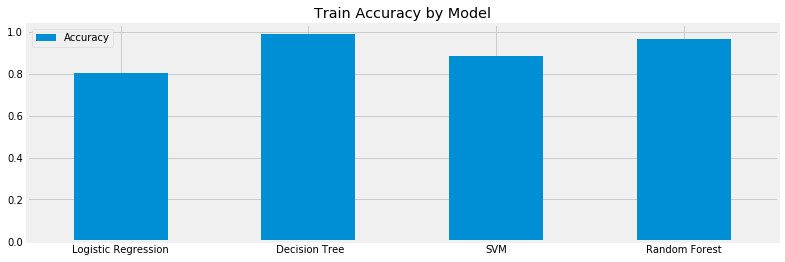

In [15]:
lb_train.plot(kind = 'bar', title = 'Train Accuracy by Model', figsize = (12,4), rot = 0)

In [16]:
lb_test = pd.DataFrame(data = [lr_test_accuracy,dt_test_accuracy,svc_test_accuracy,rf_test_accuracy], \
                        index = ['Logistic Regression', ' Decision Tree', 'SVM', 'Random Forest'], columns= ['Accuracy'])

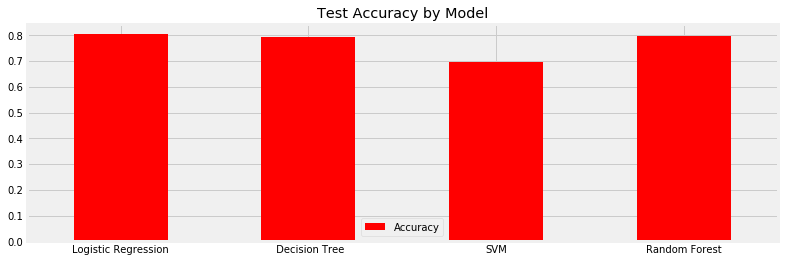

In [17]:
lb_test.plot(kind = 'bar', title = 'Test Accuracy by Model', figsize = (12,4), rot = 0, color = 'r')

In [18]:
dt_fi = pd.DataFrame(data = dt.feature_importances_, \
                     index = X_train.columns, columns = ['Importance']).sort_values(by = ['Importance'], ascending= False)

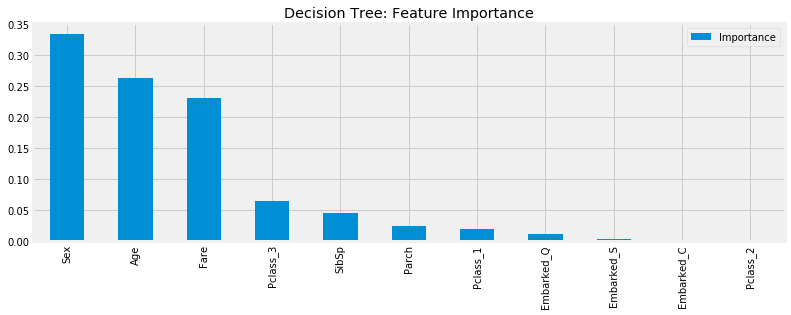

In [20]:
dt_fi.plot(kind = 'bar', title = 'Decision Tree: Feature Importance', figsize = (12,4))

In [19]:
dt_fi

,Importance
Sex,0.334213
Age,0.262589
Fare,0.230472
Pclass_3,0.064268
SibSp,0.045255
Parch,0.024154
Pclass_1,0.019821
Embarked_Q,0.011511
Embarked_S,0.003805
Embarked_C,0.001974


__Train/Test vs Cross Validation__

In [21]:
from sklearn.cross_validation import cross_val_score

index = ['Logistic Regression', ' Decision Tree', 'SVM', 'Random Forest']
models = [lr, dt, svc, rf]
cv_score = []
cv_std = []

for model in models:
    cv_score.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    cv_std.append(cross_val_score(model, X_train, y_train, cv=5).std())


In [22]:
lb_performance = pd.DataFrame({'Mean': cv_score, 'Std': cv_std}, index = index)

In [23]:
lb_performance

,Mean,Std
Logistic Regression,0.803305,0.016780
Decision Tree,0.755585,0.042143
SVM,0.676966,0.014634
Random Forest,0.782307,0.018067


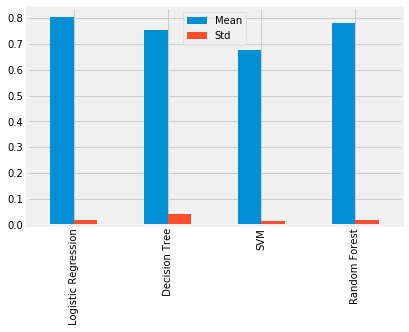

In [24]:
lb_performance.plot(kind = 'bar')

__Hyperparameter tuning for Random Forest__

__n_estimators__ <br>
n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

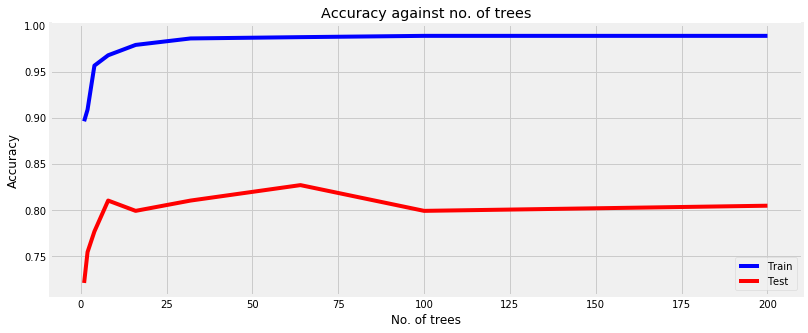

In [25]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   acc_train = rf.score(X_train, y_train)
   train_results.append(acc_train)
   acc_test = rf.score(X_test, y_test)
   test_results.append(acc_test)

plt.figure(figsize = fs)
line1 = plt.plot(n_estimators, train_results, 'b')
line2 = plt.plot(n_estimators, test_results, 'r')
plt.title('Accuracy against no. of trees')
plt.legend(['Train', 'Test'])
plt.ylabel('Accuracy')
plt.xlabel('No. of trees')
plt.show()

__max_depth__ <br>
max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 32 and plot the training and test errors.

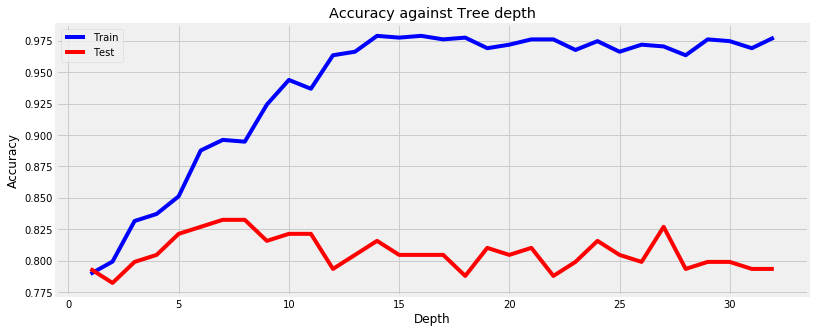

In [26]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   acc_train = rf.score(X_train, y_train)
   train_results.append(acc_train)
   acc_test = rf.score(X_test, y_test)
   test_results.append(acc_test)

plt.figure(figsize = fs)
line1 = plt.plot(max_depths, train_results, 'b')
line2 = plt.plot(max_depths, test_results, 'r')
plt.title('Accuracy against Tree depth')
plt.legend(['Train', 'Test'])
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.show()

__min_samples_split__ <br>
min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples.

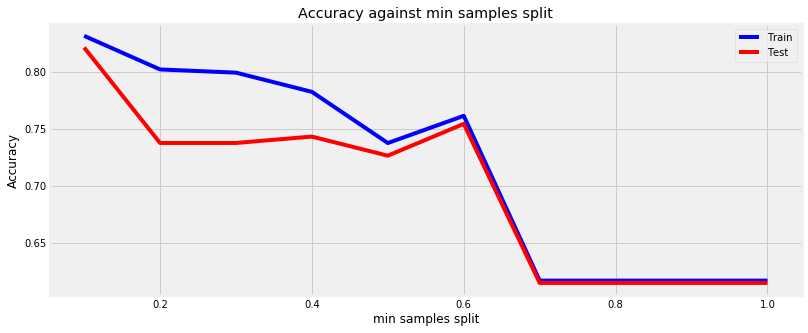

In [27]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   acc_train = rf.score(X_train, y_train)
   train_results.append(acc_train)
   acc_test = rf.score(X_test, y_test)
   test_results.append(acc_test)

plt.figure(figsize = fs)
line1 = plt.plot(min_samples_splits, train_results, 'b')
line2 = plt.plot(min_samples_splits, test_results, 'r')
plt.title('Accuracy against min samples split')
plt.legend(['Train', 'Test'])
plt.ylabel('Accuracy')
plt.xlabel('min samples split')
plt.show()

__min_samples_leafs__ <br>
min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

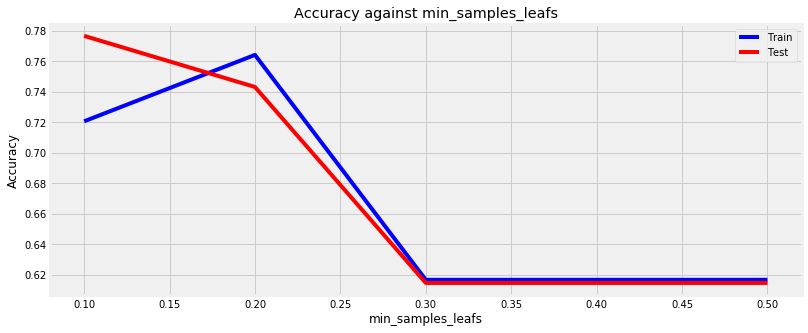

In [28]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   acc_train = rf.score(X_train, y_train)
   train_results.append(acc_train)
   acc_test = rf.score(X_test, y_test)
   test_results.append(acc_test)

plt.figure(figsize = fs)
line1 = plt.plot(min_samples_leafs, train_results, 'b')
line2 = plt.plot(min_samples_leafs, test_results, 'r')
plt.title('Accuracy against min_samples_leafs')
plt.legend(['Train', 'Test'])
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leafs')
plt.show()

__Principal Component Analysis__

In [ ]:
from sklearn.decomposition import PCA
# spliting input and target
X = df.drop(['Survived'], axis = 1)
Y = df['Survived']

pca = PCA(n_components=2).fit_transform(X) # pca output is an array
pca_df = pd.DataFrame(pca,columns=['pca_1','pca_2']) # transforming back to df
pca_Y = pd.concat([pca_df, Y],axis=1)

plt.figure(figsize = fs)
sns.FacetGrid(pca_Y, hue="Survived", palette="Set1", size=6).map(plt.scatter, "pca_1", "pca_2").add_legend()
plt.show()